# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import time
import seaborn as sn
from scipy import stats

# Import API key
from api_keys import g_key
from api_keys import weather_api_key
gmaps.configure(api_key=g_key)

API_configure = weather_api_key 

## Generate Cities List

In [49]:
vacation_df = pd.read_csv("../output_data/worldcities.csv")
vacation_cities_df = pd.read_csv("../output_data/cities.csv")
vacation_combined_df = pd.merge(vacation_df, vacation_cities_df, how = 'right', on = 'City')
cities_count = vacation_combined_df["City"].to_list()
city_dict = vacation_combined_df.set_index("City").to_dict()["City_ID"]
print(len(city_dict))

548


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [50]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
temperatures = []
cities = cities_count 
cities_id = vacation_combined_df["City_ID"].to_list()

# Build partial query URL
for city in cities[:5]:
    # Build query URL based on current element in units

    query_url = url + "appid=" + API_configure + "&q=" + city + "&units=" + units

    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    
    # Get temperature from JSON response
    temperature = weather_json["main"]["temp"]
    
    temperatures.append(temperature)
    time.sleep(2)
    print("Fetching temperature for " + city + " and it is " + str(temperature))

Fetching temperature for ostrovnoy and it is 2.4
Fetching temperature for mahebourg and it is 21.81
Fetching temperature for qaanaaq and it is -10.28
Fetching temperature for zhuhai and it is 22.94
Fetching temperature for cape town and it is 16.53


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [51]:
vacation_combined_df.to_csv(r'city_data.csv', index=False)

In [52]:
vacation_combined_df

,Country_x,City,Latitude,Longitude,City_ID,Cloudiness,Country_y,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ru,ostrovnoy,68.053056,39.513056,0,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,mu,mahebourg,-20.408056,57.700000,1,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,gl,qaanaaq,77.489444,-69.332222,2,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,cn,zhuhai,22.276944,113.567778,3,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,za,cape town,-33.925839,18.423218,4,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,ph,paraiso,6.473611,124.810833,544,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
811,ph,paraiso,10.884900,123.362700,544,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
812,in,veraval,20.900000,70.366667,545,0,FR,1558378898,62,49.65,0.71,61.00,8.05
813,ru,novyy urgal,51.073611,132.564167,546,100,RU,1558378899,93,51.07,132.56,49.74,2.68


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [53]:
#  Get the indices of cities that have humidity over 100%.
humidity_df = vacation_combined_df["City"].loc[vacation_combined_df["Humidity"] >= 100]
humidity_df["Humidity"] = vacation_combined_df["Humidity"].loc[vacation_combined_df["Humidity"] >= 100]
humidity_df.head()

85     hambantota
185         paita
186         paita
228        manado
253      keflavik
Name: City, dtype: object

In [58]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_data = vacation_combined_df.drop([85,185,186,228,253], inplace=False)
clean_city_data = city_data

In [59]:
clean_city_data


,Country_x,City,Latitude,Longitude,City_ID,Cloudiness,Country_y,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ru,ostrovnoy,68.053056,39.513056,0,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,mu,mahebourg,-20.408056,57.700000,1,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,gl,qaanaaq,77.489444,-69.332222,2,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,cn,zhuhai,22.276944,113.567778,3,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,za,cape town,-33.925839,18.423218,4,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,ph,paraiso,6.473611,124.810833,544,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
811,ph,paraiso,10.884900,123.362700,544,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
812,in,veraval,20.900000,70.366667,545,0,FR,1558378898,62,49.65,0.71,61.00,8.05
813,ru,novyy urgal,51.073611,132.564167,546,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [62]:

clean_city_data.columns=['country','city','latitude','longitude','city_id','cloudiness','country_code','date','humidity', 'lat','lng', 'max_temp','wind_speed']

In [68]:
clean_city_data = clean_city_data.reset_index()

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

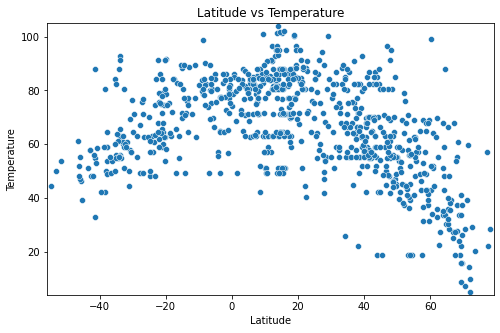

<Figure size 432x288 with 0 Axes>

In [73]:
plt.figure(figsize=(8,5))
sn.scatterplot(data=clean_city_data,x="latitude",y="max_temp")
plt.title("Latitude vs Temperature") 
plt.xlabel("Latitude") #x label
plt.ylabel("Temperature") #y label
plt.xlim(clean_city_data.latitude.min()-1,clean_city_data.latitude.max()+1)                #set x limit
plt.ylim(clean_city_data.max_temp.min()-1,clean_city_data.max_temp.max()+1)              #set y limit
plt.show()
plt.savefig("../Images/latvtemp.png", dpi=300)

## Latitude vs. Humidity Plot

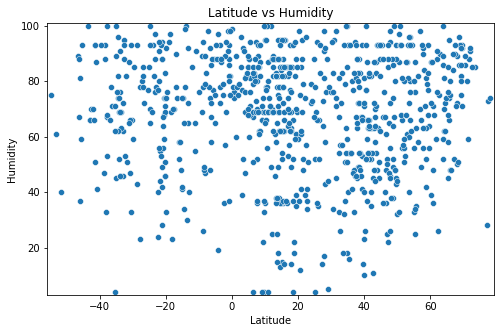

<Figure size 432x288 with 0 Axes>

In [74]:
plt.figure(figsize=(8,5))
sn.scatterplot(data=clean_city_data,x="latitude",y="humidity")
plt.title("Latitude vs Humidity") 
plt.xlabel("Latitude") #x label
plt.ylabel("Humidity") #y label
plt.xlim(clean_city_data.latitude.min()-1,clean_city_data.latitude.max()+1)                #set x limit
plt.ylim(clean_city_data.humidity.min()-1,clean_city_data.humidity.max()+1)              #set y limit
plt.show()
plt.savefig("../Images/latvhum.png", dpi=300)

## Latitude vs. Cloudiness Plot

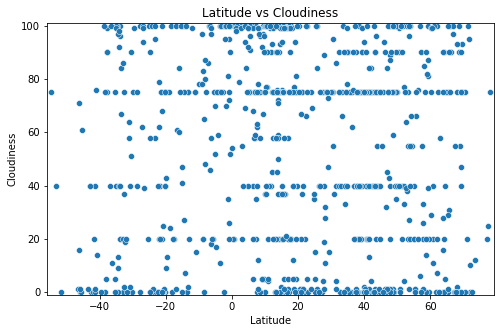

<Figure size 432x288 with 0 Axes>

In [76]:
plt.figure(figsize=(8,5))
sn.scatterplot(data=clean_city_data,x="latitude",y="cloudiness")
plt.title("Latitude vs Cloudiness") 
plt.xlabel("Latitude") #x label
plt.ylabel("Cloudiness") #y label
plt.xlim(clean_city_data.latitude.min()-1,clean_city_data.latitude.max()+1)                #set x limit
plt.ylim(clean_city_data.cloudiness.min()-1,clean_city_data.cloudiness.max()+1)              #set y limit
plt.show()
plt.savefig("../Images/latvcloud.png", dpi=300)

## Latitude vs. Wind Speed Plot

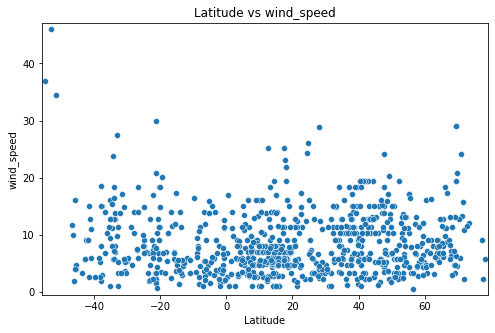

<Figure size 432x288 with 0 Axes>

In [77]:
plt.figure(figsize=(8,5))
sn.scatterplot(data=clean_city_data,x="latitude",y="wind_speed")
plt.title("Latitude vs wind_speed") 
plt.xlabel("Latitude") #x label
plt.ylabel("wind_speed") #y label
plt.xlim(clean_city_data.latitude.min()-1,clean_city_data.latitude.max()+1)                #set x limit
plt.ylim(clean_city_data.wind_speed.min()-1,clean_city_data.wind_speed.max()+1)              #set y limit
plt.show()
plt.savefig("../Images/latvwind.png", dpi=300)

## Linear Regression

In [81]:
nhem = clean_city_data[clean_city_data.latitude >=0]
shem = clean_city_data[clean_city_data.latitude < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

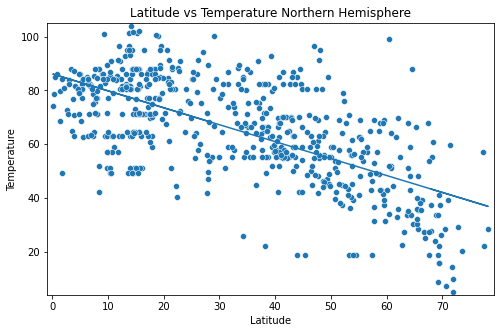

<Figure size 432x288 with 0 Axes>

In [86]:
plt.figure(figsize=(8,5))
sn.scatterplot(data=nhem,x="latitude",y="max_temp")
plt.title("Latitude vs Temperature Northern Hemisphere") 
plt.xlabel("Latitude") #x label
plt.ylabel("Temperature") #y label
plt.xlim(nhem.latitude.min()-1,nhem.latitude.max()+1)                #set x limit
plt.ylim(nhem.max_temp.min()-1,nhem.max_temp.max()+1)              #set y limit
nh_slope, nh_int, nh_r, nh_p, nh_std_err = stats.linregress(nhem.latitude,nhem.max_temp)
nh_fit = nh_slope * nhem.latitude + nh_int
plt.plot(nhem.latitude, nh_fit, "-")
plt.show()
plt.savefig("../Images/latvtempnhem.png", dpi=300)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

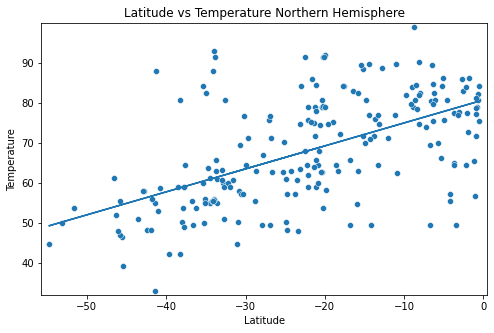

<Figure size 432x288 with 0 Axes>

In [85]:
plt.figure(figsize=(8,5))
sn.scatterplot(data=shem,x="latitude",y="max_temp")
plt.title("Latitude vs Temperature Southern Hemisphere") 
plt.xlabel("Latitude") #x label
plt.ylabel("Temperature") #y label
plt.xlim(shem.latitude.min()-1,shem.latitude.max()+1)                #set x limit
plt.ylim(shem.max_temp.min()-1,shem.max_temp.max()+1)              #set y limit
sh_slope, sh_int, sh_r, sh_p, sh_std_err = stats.linregress(shem.latitude,shem.max_temp)
sh_fit = sh_slope * shem.latitude + sh_int
plt.plot(shem.latitude, sh_fit, "-")
plt.show()
plt.savefig("../Images/latvtempshem.png", dpi=300)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

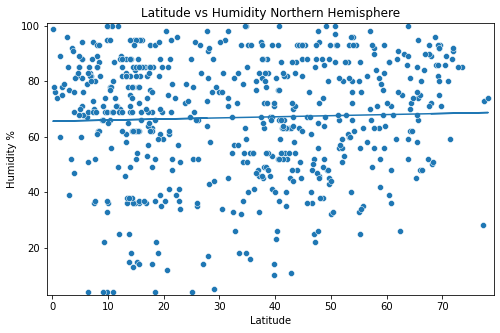

<Figure size 432x288 with 0 Axes>

In [94]:
plt.figure(figsize=(8,5))
sn.scatterplot(data=nhem,x="latitude",y="humidity")
plt.title("Latitude vs Humidity Northern Hemisphere") 
plt.xlabel("Latitude") #x label
plt.ylabel("Humidity %") #y label
plt.xlim(nhem.latitude.min()-1,nhem.latitude.max()+1)                #set x limit
plt.ylim(nhem.humidity.min()-1,nhem.humidity.max()+1)              #set y limit
nh_slope, nh_int, nh_r, nh_p, nh_std_err = stats.linregress(nhem.latitude,nhem.humidity)
nh_fit = nh_slope * nhem.latitude + nh_int
plt.plot(nhem.latitude, nh_fit, "-")
plt.show()
plt.savefig("../Images/latvhumnhem.png", dpi=300)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

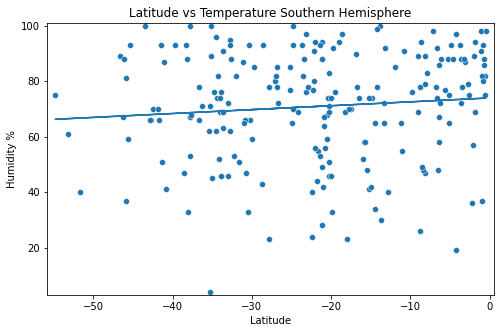

<Figure size 432x288 with 0 Axes>

In [95]:
plt.figure(figsize=(8,5))
sn.scatterplot(data=shem,x="latitude",y="humidity")
plt.title("Latitude vs Temperature Southern Hemisphere") 
plt.xlabel("Latitude") #x label
plt.ylabel("Humidity %") #y label
plt.xlim(shem.latitude.min()-1,shem.latitude.max()+1)                #set x limit
plt.ylim(shem.humidity.min()-1,shem.humidity.max()+1)              #set y limit
sh_slope, sh_int, sh_r, sh_p, sh_std_err = stats.linregress(shem.latitude,shem.humidity)
sh_fit = sh_slope * shem.latitude + sh_int
plt.plot(shem.latitude, sh_fit, "-")
plt.show()
plt.savefig("../Images/latvhumshem.png", dpi=300)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

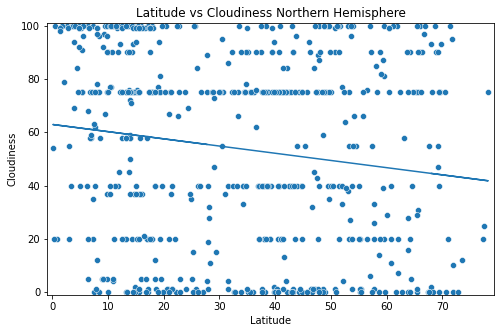

<Figure size 432x288 with 0 Axes>

In [92]:
plt.figure(figsize=(8,5))
sn.scatterplot(data=nhem,x="latitude",y="cloudiness")
plt.title("Latitude vs Cloudiness Northern Hemisphere") 
plt.xlabel("Latitude") #x label
plt.ylabel("Cloudiness") #y label
plt.xlim(nhem.latitude.min()-1,nhem.latitude.max()+1)                #set x limit
plt.ylim(nhem.cloudiness.min()-1,nhem.cloudiness.max()+1)              #set y limit
nh_slope, nh_int, nh_r, nh_p, nh_std_err = stats.linregress(nhem.latitude,nhem.cloudiness)
nh_fit = nh_slope * nhem.latitude + nh_int
plt.plot(nhem.latitude, nh_fit, "-")
plt.show()
plt.savefig("../Images/latvcloudnhem.png", dpi=300)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

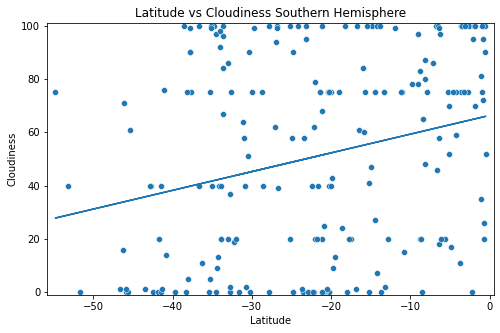

<Figure size 432x288 with 0 Axes>

In [93]:
plt.figure(figsize=(8,5))
sn.scatterplot(data=shem,x="latitude",y="cloudiness")
plt.title("Latitude vs Cloudiness Southern Hemisphere") 
plt.xlabel("Latitude") #x label
plt.ylabel("Cloudiness") #y label
plt.xlim(shem.latitude.min()-1,shem.latitude.max()+1)                #set x limit
plt.ylim(shem.cloudiness.min()-1,shem.cloudiness.max()+1)              #set y limit
sh_slope, sh_int, sh_r, sh_p, sh_std_err = stats.linregress(shem.latitude,shem.cloudiness)
sh_fit = sh_slope * shem.latitude + sh_int
plt.plot(shem.latitude, sh_fit, "-")
plt.show()
plt.savefig("../Images/latvcloudshem.png", dpi=300)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

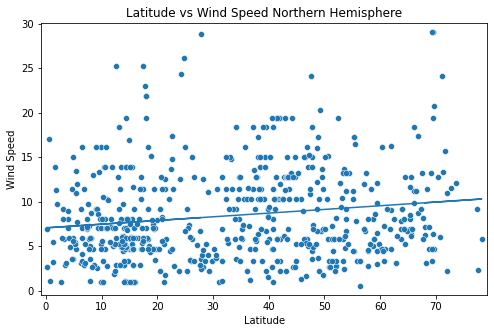

<Figure size 432x288 with 0 Axes>

In [90]:
plt.figure(figsize=(8,5))
sn.scatterplot(data=nhem,x="latitude",y="wind_speed")
plt.title("Latitude vs Wind Speed Northern Hemisphere") 
plt.xlabel("Latitude") #x label
plt.ylabel("Wind Speed") #y label
plt.xlim(nhem.latitude.min()-1,nhem.latitude.max()+1)                #set x limit
plt.ylim(nhem.wind_speed.min()-1,nhem.wind_speed.max()+1)              #set y limit
nh_slope, nh_int, nh_r, nh_p, nh_std_err = stats.linregress(nhem.latitude,nhem.wind_speed)
nh_fit = nh_slope * nhem.latitude + nh_int
plt.plot(nhem.latitude, nh_fit, "-")
plt.show()
plt.savefig("../Images/latvwindnhem.png", dpi=300)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

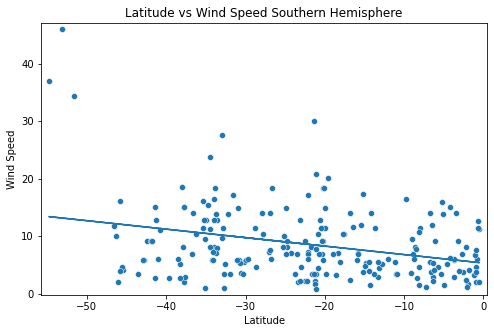

<Figure size 432x288 with 0 Axes>

In [89]:
plt.figure(figsize=(8,5))
sn.scatterplot(data=shem,x="latitude",y="wind_speed")
plt.title("Latitude vs Wind Speed Southern Hemisphere") 
plt.xlabel("Latitude") #x label
plt.ylabel("Wind Speed") #y label
plt.xlim(shem.latitude.min()-1,shem.latitude.max()+1)                #set x limit
plt.ylim(shem.wind_speed.min()-1,shem.wind_speed.max()+1)              #set y limit
sh_slope, sh_int, sh_r, sh_p, sh_std_err = stats.linregress(shem.latitude,shem.wind_speed)
sh_fit = sh_slope * shem.latitude + sh_int
plt.plot(shem.latitude, sh_fit, "-")
plt.show()
plt.savefig("../Images/latvwindshem.png", dpi=300)